In [1]:
from model_learning.examples.reward_model_multiagent_inference import *
from model_learning.examples.reward_model_multiagent_inference import OUTPUT_DIR

FOLDER_NAME = f'team_trajs_{len(MODEL_ROLES)}models_{NUM_TRAJECTORIES}x{TRAJ_LENGTH}_{MODEL_RATIONALITY}'
TRAJ_DIR = os.path.join(OUTPUT_DIR, FOLDER_NAME)
print(TRAJ_DIR)
if not os.path.exists(TRAJ_DIR):
    os.mkdir(TRAJ_DIR)
LOAD = 1


/Users/haochen/Desktop/IRL/model-learning/model_learning/examples/output/examples/reward-model-multiagent/team_trajs_2models_16x25_1


In [2]:
if LOAD: # load collected traj history data file
    f = bz2.BZ2File(os.path.join(OUTPUT_DIR, f'{FOLDER_NAME}.pkl'), 'rb')
    team_trajs = pickle.load(f)
    f.close()
    print(team_trajs)
else:
    team_trajs = []

[[<model_learning.TeamStateinfoActionModelTuple object at 0x7fcd6551a7f0>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd6555fa00>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd6555f760>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd6555f070>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd6555f430>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0130>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0310>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0430>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0550>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0670>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb07f0>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0910>, <model_learning.TeamStateinfoActionModelTuple object at 0x7fcd67eb0a90>, <model_learning.TeamStateinfoActionModelTuple obj

In [3]:
from model_learning.examples.reward_model_multiagent_inference import _get_fancy_name, _get_belief
from model_learning.util.plot import plot_evolution

# TEAM_AGENTS = ['Goal', 'Navigator']
# MODEL_ROLES = ['Self', 'Random']
team_models = {f'{agent_name}_{role_name}': 0 for role_name in MODEL_ROLES for agent_name in TEAM_AGENTS}
MODEL_NAMES = list(team_models.keys())

def get_team_model_evolution_data(team_trajs, show_info=False):
    model_evolve = []
    for traj_i, team_traj in enumerate(team_trajs):
        model_evolve_per_traj = []
        for step_i, tsam in enumerate(team_traj):
            if step_i > -1:
                _world_state = tsam.state
                if show_info:
                    print('==================')
                    print('Step', step_i)
                    [print(tsam.action[agent_name]) for agent_name in TEAM_AGENTS]
                    print(tsam.model_dist)
                model_dist = tsam.model_dist
                model_evolve_per_traj.append(list(model_dist.values()))
        model_evolve.append(model_evolve_per_traj)
    return np.array(model_evolve)

def get_agent_evolve_from(team_evolve, model_name):
    assert type(team_evolve) == np.ndarray
    assert model_name in MODEL_NAMES
    return team_evolve[:, :, MODEL_NAMES.index(model_name)]

if LOAD:
    team_probs = get_team_model_evolution_data(team_trajs)
    np.savez(os.path.join(TRAJ_DIR, f'team_trajs.npz'), team_probs=team_probs)

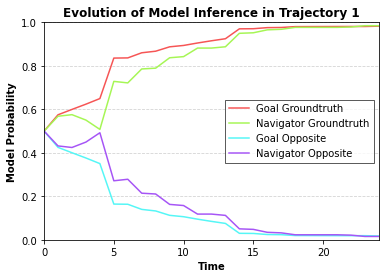

In [4]:
# import matplotlib.pyplot as plt
%matplotlib inline

team_probs = np.load(os.path.join(TRAJ_DIR, f'team_trajs.npz'))['team_probs']
traj_i = 0
plot_evolution(team_probs[traj_i].T, [_get_fancy_name(name) for name in MODEL_NAMES],
               f'Evolution of Model Inference in Trajectory {traj_i+1}', None,
               os.path.join(TRAJ_DIR, f'inference_{traj_i}.png'), 'Time', 'Model Probability', True, [0,1])

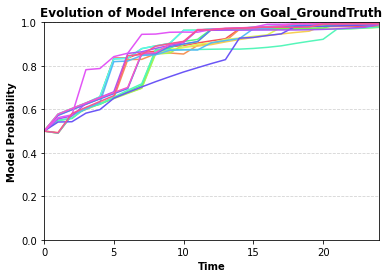

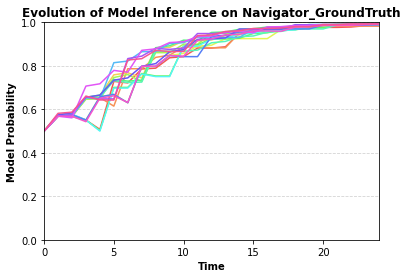

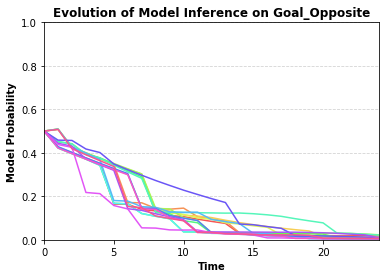

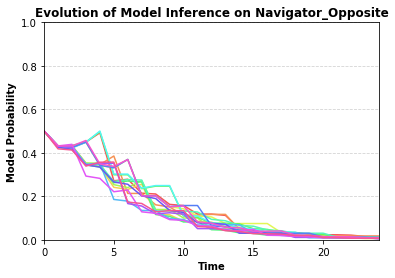

In [5]:
for model_name in MODEL_NAMES:
    agent_probs = get_agent_evolve_from(team_probs, model_name)
    plot_evolution(agent_probs, [_get_fancy_name(model_name) for i in range(len(agent_probs))],
               f'Evolution of Model Inference on {model_name}', None,
               os.path.join(TRAJ_DIR, f'inference_{model_name}.png'), 'Time', 'Model Probability', True, [0,1])